
--- Logistic Regression ---
[[2112  546]
 [1390  952]]
              precision    recall  f1-score   support

           0       0.60      0.79      0.69      2658
           1       0.64      0.41      0.50      2342

    accuracy                           0.61      5000
   macro avg       0.62      0.60      0.59      5000
weighted avg       0.62      0.61      0.60      5000

ROC AUC: 0.6005

--- Random Forest ---
[[1851  807]
 [1157 1185]]
              precision    recall  f1-score   support

           0       0.62      0.70      0.65      2658
           1       0.59      0.51      0.55      2342

    accuracy                           0.61      5000
   macro avg       0.61      0.60      0.60      5000
weighted avg       0.61      0.61      0.60      5000

ROC AUC: 0.6012


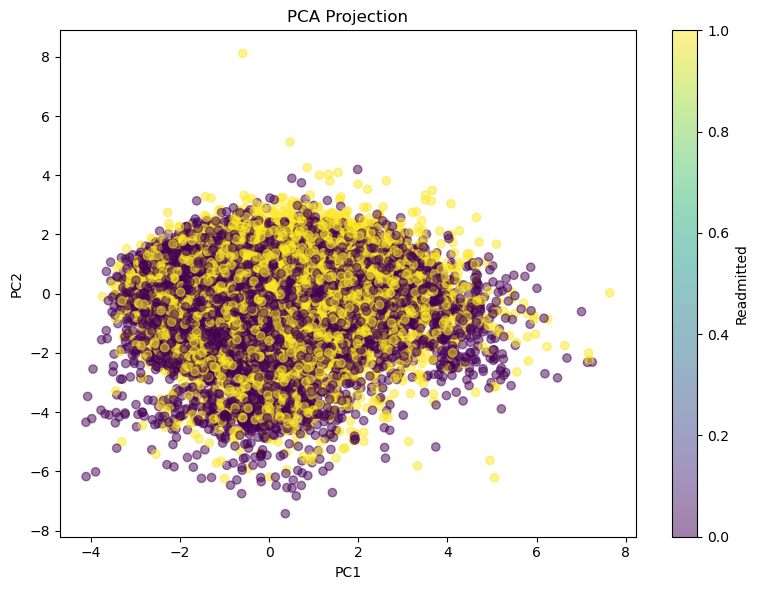

Model and scaler saved for deployment.


In [1]:
# Hospital Readmission Prediction - Capstone Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle

# Load Dataset
df = pd.read_csv("hospital_readmissions.csv")

# Encode binary categorical variables
binary_map = {'yes': 1, 'no': 0}
df['change'] = df['change'].map(binary_map)
df['diabetes_med'] = df['diabetes_med'].map(binary_map)
df['readmitted'] = df['readmitted'].map(binary_map)

# Label encode ordinal and nominal categorical variables
le = LabelEncoder()
df['age'] = le.fit_transform(df['age'])
df['glucose_test'] = le.fit_transform(df['glucose_test'])
df['A1Ctest'] = le.fit_transform(df['A1Ctest'])

# One-hot encode medical_specialty, diag_1, diag_2, diag_3
df = pd.get_dummies(df, columns=['medical_specialty', 'diag_1', 'diag_2', 'diag_3'], drop_first=True)

# Feature/target split
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print(f"ROC AUC: {roc_auc_score(y_true, y_pred):.4f}")

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Optional: PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Readmitted')
plt.tight_layout()
plt.show()

# Optional: KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Save the best model for deployment
with open('model.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and scaler saved for deployment.")
